<a href="https://colab.research.google.com/github/swaraj1-sys/Mnist_ml_project_swaraj/blob/Mnist/Mnist_MLdataset_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mnist dataset importing important libraries

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.datasets import fetch_openml
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mnist = fetch_openml('mnist_784')
dict_keys = (['data', 'target','frame','categories','feature_names','target_names','DESCR','details','url'])
data = mnist.data
labels = mnist.target

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


we will pick a random data point to get acquainted with an image and its shape

In [37]:
n = np.random.choice(np.arange(data.shape[0]+1))
print(n)

57963


In [38]:
test_img = data.iloc[n].values
test_label = mnist.target.iloc[n]
print(test_img.shape)

(784,)


In [39]:
side_length = int(np.sqrt(test_img.shape))
reshaped_test_img = test_img.reshape(side_length,side_length)
print("img label:" +str(test_label))

img label:0


<ipython-input-39-186e52879b74>:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  side_length = int(np.sqrt(test_img.shape))


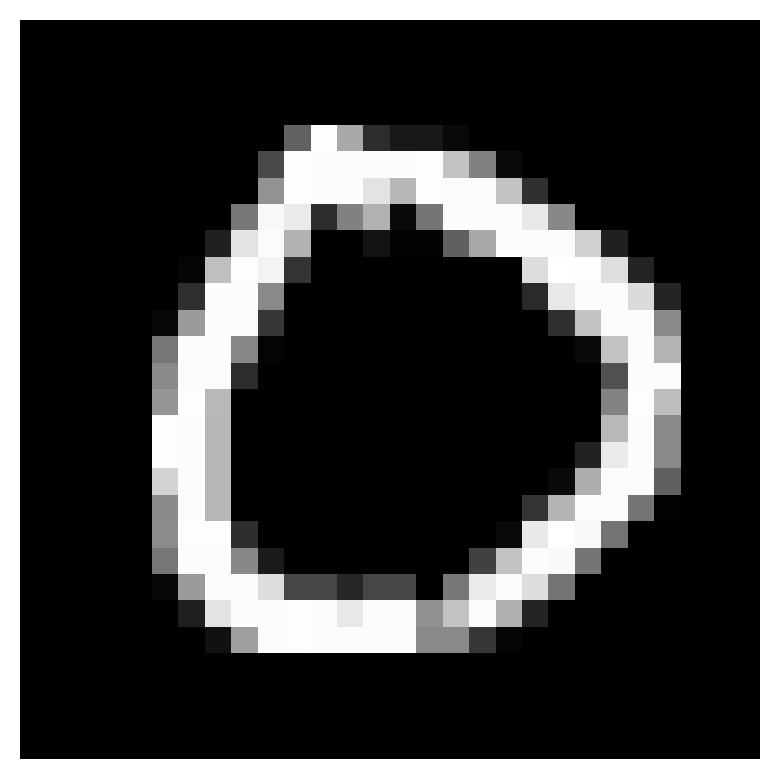

In [40]:
plt.imshow(reshaped_test_img,cmap='gray')
plt.axis('off')
plt.show()

In [41]:
w1 = np.ones((784, 4)) * 0.01
z1 = np.dot(data, w1)
print(z1.shape)
w2 = np.ones((4, 10))
z2 = np.dot(z1, w2)
print(z2.shape)

(70000, 4)
(70000, 10)


Let's set the stage for nn now , let us make some nn stuff now

# I have used RELU (Rectified linear unit here ) It basically works as non-linear activation function in the dataset

In [42]:

def sigmoid(z: np.ndarray) -> np.ndarray:
    return 1.0 / (1.0 + np.exp(-z))
def relu(z: np.ndarray) -> np.ndarray:
    return np.maximum(0, z)
def tanh(z: np.ndarray) -> np.ndarray:
    return np.tanh(z)
def leaky_relu(z: np.ndarray) -> np.ndarray:
    return np.where(z > 0, z, z * 0.01)

Output layer is set using (SOFTMAX)it is a multiclass classification problem

In [43]:
def softmax(z:np.ndarray)->np.ndarray:
  e = np.exp(z-np.max(z))
  return e / np.sum(e,axis=0)

Let us normalize our dataset now to scale the inputs to the [0,1] range

In [44]:
def normalize(x: np.ndarray)->np.ndarray:
  return (x - np.min(x)) / (np.max(x) - np.min(x))

now to encode this data with one_hot_encode technique is actually a way in which One-hot encoding is a technique in machine learning that turns categorical data, like colors (red, green, blue), into numerical data for machines to understand.

In [45]:
def one_hot_encode(x: np.ndarray, num_labels: int) -> np.ndarray:
  return np.eye(num_labels)[x]

derivates

In [46]:
def derivative(function_name: str, z: np.ndarray) -> np.ndarray:
    if function_name == "sigmoid":
        return sigmoid(z) * (1 - sigmoid(z))
    if function_name == "tanh":
        return 1 - np.square(tanh(z))
    if function_name == "relu":
        y = (z > 0) * 1
        return y
    if function_name == "leaky_relu":
        return  np.where(z > 0, 1, 0.01)
    return "No such activation"

In [47]:

def __init__(self, X: np.ndarray, y: np.ndarray, X_test: np.ndarray, y_test: np.ndarray, activation: str, num_labels: int, architecture: list[int]):
        self.X = normalize(X) # normalize training data in range 0,1
        assert np.all((self.X >= 0) | (self.X <= 1)) # test that normalize succeded
        self.X, self.X_test = X.copy(), X_test.copy()
        self.y, self.y_test = y.copy(), y_test.copy()
        self.layers = {} # define dict to store results of activation
        self.architecture = architecture # size of hidden layers as array
        self.activation = activation # activation function
        assert self.activation in ["relu", "tanh", "sigmoid", "leaky_relu"]
        self.parameters = {}
        self.num_labels = num_labels
        self.m = X.shape[1]
        self.architecture.append(self.num_labels)
        self.num_input_features = X.shape[0]
        self.architecture.insert(0, self.num_input_features)
        self.L = len(architecture)
        assert self.X.shape == (self.num_input_features, self.m)
        assert self.y.shape == (self.num_labels, self.m)

In [48]:
def initialize_parameters(self):
  for i in range (1, self.L):
    print(f"initialized parameters for layers: {i}.")
    self.parameters["w+str(i)"] = np.random.randn(self.architecture[i], self.architecture[i-1])*0.01
    self.parameters["b+str(i)"] = np.zeros((self.architecture[i],1))


In [49]:
def forward(self):
        params=self.parameters
        self.layers["a0"] = self.X
        for l in range(1, self.L-1):
            self.layers["z" + str(l)] = np.dot(params["w" + str(l)],
                                               self.layers["a"+str(l-1)]) + params["b"+str(l)]
            self.layers["a" + str(l)] = eval(self.activation)(self.layers["z"+str(l)])
            assert self.layers["a"+str(l)].shape == (self.architecture[l], self.m)
        self.layers["z" + str(self.L-1)] = np.dot(params["w" + str(self.L-1)],
                                                  self.layers["a"+str(self.L-2)]) + params["b"+str(self.L-1)]
        self.layers["a"+str(self.L-1)] = softmax(self.layers["z"+str(self.L-1)])
        self.output = self.layers["a"+str(self.L-1)]
        assert self.output.shape == (self.num_labels, self.m)
        assert all([s for s in np.sum(self.output, axis=1)])

        cost = - np.sum(self.y * np.log(self.output + 0.000000001))

        return cost, self.layers

In [50]:
def backpropagate(self):
        derivatives = {}
        dZ = self.output - self.y
        assert dZ.shape == (self.num_labels, self.m)
        dW = np.dot(dZ, self.layers["a" + str(self.L-2)].T) / self.m
        db = np.sum(dZ, axis=1, keepdims=True) / self.m
        dAPrev = np.dot(self.parameters["w" + str(self.L-1)].T, dZ)
        derivatives["dW" + str(self.L-1)] = dW
        derivatives["db" + str(self.L-1)] = db

        for l in range(self.L-2, 0, -1):
            dZ = dAPrev * derivative(self.activation, self.layers["z" + str(l)])
            dW = 1. / self.m * np.dot(dZ, self.layers["a" + str(l-1)].T)
            db = 1. / self.m * np.sum(dZ, axis=1, keepdims=True)
            if l > 1:
                dAPrev = np.dot(self.parameters["w" + str(l)].T, (dZ))
            derivatives["dW" + str(l)] = dW
            derivatives["db" + str(l)] = db
        self.derivatives = derivatives

        return self.derivatives

In [51]:
def fit(self, lr=0.01, epochs=1000):
        self.costs = []
        self.initialize_parameters()
        self.accuracies = {"train": [], "test": []}
        for epoch in tqdm(range(epochs), colour="BLUE"):
            cost, cache = self.forward()
            self.costs.append(cost)
            derivatives = self.backpropagate()
            for layer in range(1, self.L):
                self.parameters["w"+str(layer)] = self.parameters["w"+str(layer)] - lr * derivatives["dW" + str(layer)]
                self.parameters["b"+str(layer)] = self.parameters["b"+str(layer)] - lr * derivatives["db" + str(layer)]
            train_accuracy = self.accuracy(self.X, self.y)
            test_accuracy = self.accuracy(self.X_test, self.y_test)
            if epoch % 10 == 0:
                print(f"Epoch: {epoch:3d} | Cost: {cost:.3f} | Accuracy: {train_accuracy:.3f}")
            self.accuracies["train"].append(train_accuracy)
            self.accuracies["test"].append(test_accuracy)
        print("Training terminated")

In [52]:
def predict(self, x):
        params = self.parameters
        n_layers = self.L - 1
        values = [x]
        for l in range(1, n_layers):
            z = np.dot(params["w" + str(l)], values[l-1]) + params["b" + str(l)]
            a = eval(self.activation)(z)
            values.append(a)
        z = np.dot(params["w"+str(n_layers)], values[n_layers-1]) + params["b"+str(n_layers)]
        a = softmax(z)
        if x.shape[1]>1:
            ans = np.argmax(a, axis=0)
        else:
            ans = np.argmax(a)
        return ans


def accuracy(self, X, y):
    P = self.predict(X)
    return sum(np.equal(P, np.argmax(y, axis=0))) / y.shape[1]*100

In [53]:
train_test_split_no = 60000
X_train = data.values[:train_test_split_no].T
y_train = labels[:train_test_split_no].values.astype(int)
y_train = one_hot_encode(y_train, 10).T
X_test = data.values[train_test_split_no:].T
y_test = labels[train_test_split_no:].values.astype(int)
y_test = one_hot_encode(y_test, 10).T
X_train.shape, X_test.shape

((784, 60000), (784, 10000))

In [61]:
!pip install NN

  Preparing metadata (setup.py) ... done
  Created wheel for NN: filename=nn-0.1.1-py3-none-any.whl size=5707 sha256=76a1b9c0adb90c68b4e6c054eea133419c4c78d7e41bcb5f06ed6bdf370021cf
  Stored in directory: /root/.cache/pip/wheels/60/62/98/7126b3684829be2701b0f07444922e84b3304646574a159431
Successfully built NN


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


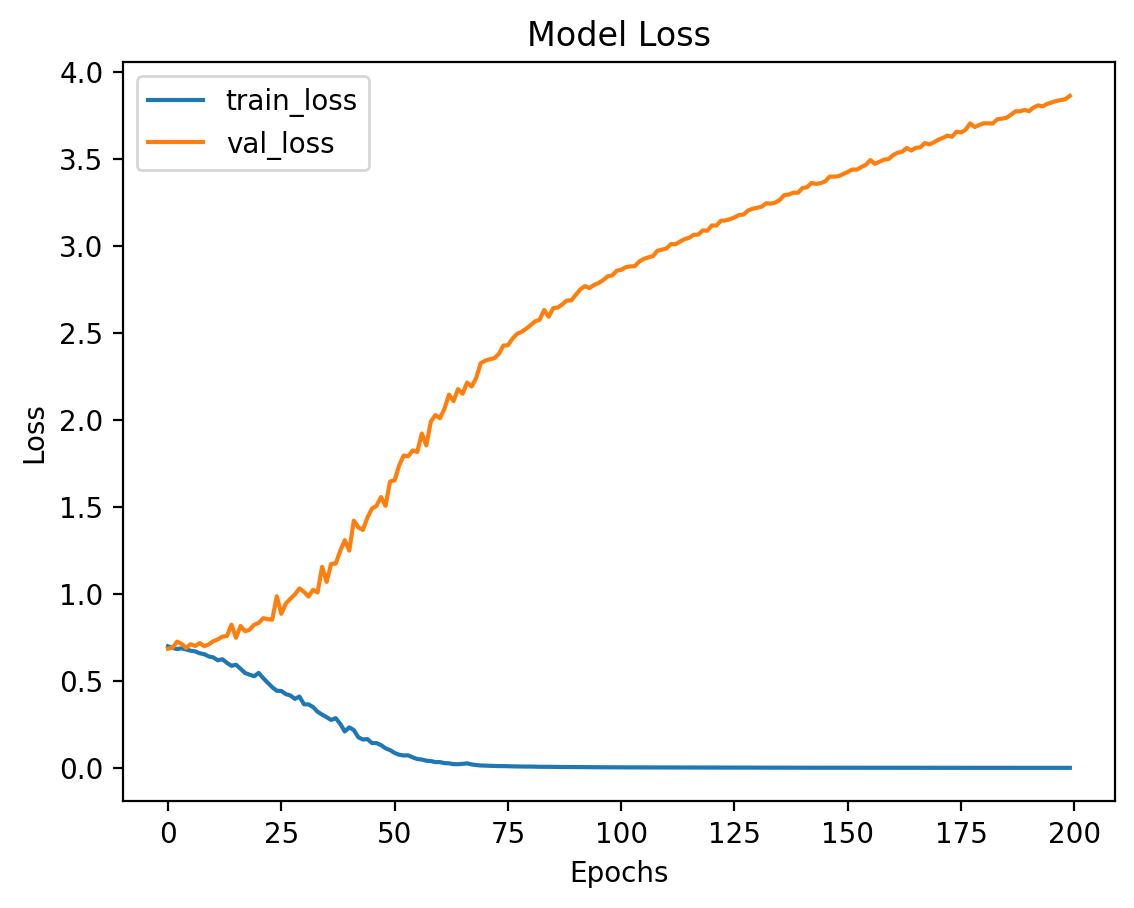

In [63]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

class NN:
    def __init__(self, X_train, y_train, X_test, y_test, activation, epochs, layers):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test = X_test
        self.y_test = y_test
        self.activation = activation
        self.epochs = epochs
        self.layers = layers
        self.history = None

        # Initialize the model
        self.model = Sequential()
        # Input layer
        self.model.add(Dense(layers[0], input_shape=(X_train.shape[1],), activation=activation))
        # Hidden layers
        for layer_size in layers[1:]:
            self.model.add(Dense(layer_size, activation=activation))
        # Output layer
        self.model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    def fit(self, X, y, lr, epochs):
        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                           loss='binary_crossentropy',
                           metrics=['accuracy'])
        self.history = self.model.fit(X, y, epochs=epochs, validation_split=0.2, verbose=0)

    def plot_cost(self, lr):
        plt.plot(self.history.history['loss'], label='train_loss')
        plt.plot(self.history.history['val_loss'], label='val_loss')
        plt.title('Model Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.show()

# Generate dummy data
X_train = np.random.random((1000, 20))
y_train = np.random.randint(2, size=(1000, 1))
X_test = np.random.random((100, 20))
y_test = np.random.randint(2, size=(100, 1))

PARAMS = [X_train, y_train, X_test, y_test, "relu", 10, [128, 32]]
nn_relu = NN(*PARAMS)
epochs_relu = 200
lr_relu = 0.003

nn_relu.fit(X_train, y_train, lr=lr_relu, epochs=epochs_relu)
nn_relu.plot_cost(lr_relu)
